<h2> Web Scrapping of Population data </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://www.citypopulation.de/en/nepal/mun/admin/?fbclid=IwAR1cELwT8UdD3WjgIpG6xH_gLk9qSTsyiB_JqYsl-KewRXMPiWDTX49iFFQ"
tables = pd.read_html(url)
print(tables)

[                   Name              Status         Transcription  \
0                Achham            District                Achāma   
1    Bannigadhi Jaygadh  Rural Municipality  Bānnigaḍhī Jayagaḍha   
2             Chaurpati  Rural Municipality             Caurapāṭī   
3               Dhakari  Rural Municipality               Ḍhakārī   
4            Kamalbazar        Municipality          Kamalabajāra   
..                  ...                 ...                   ...   
846         Chaurjahari        Municipality           Caurajahārī   
847             Musikot        Municipality              Musikōṭa   
848          Sani Bheri  Rural Municipality            Sānī Bhērī   
849             Triveni  Rural Municipality               Trivēṇī   
850               Nepal    Federal Republic                Nēpāla   

                        Native PopulationCensus2001-05-28  \
0                  अछाम जिल्ला                     231285   
1    बान्निगढी जयगढ गाउँपालिका                  

In [3]:
tables[0].head()

,Name,Status,Transcription,Native,PopulationCensus2001-05-28,PopulationCensus2011-06-22,PopulationCensus2021-11-25,Unnamed: 7
0,Achham,District,Achāma,अछाम जिल्ला,231285,257477,228852,→
1,Bannigadhi Jaygadh,Rural Municipality,Bānnigaḍhī Jayagaḍha,बान्निगढी जयगढ गाउँपालिका,17102,17426,13519,→
2,Chaurpati,Rural Municipality,Caurapāṭī,चौरपाटी गाउँपालिका,23323,25215,21681,→
3,Dhakari,Rural Municipality,Ḍhakārī,ढकारी गाउँपालिका,...,21570,21998,→
4,Kamalbazar,Municipality,Kamalabajāra,कमलबजार नगरपालिका,...,23770,21032,→


In [4]:
# Assigining new variables for population

population = tables[0]

In [5]:
population.dtypes

Name                          object
Status                        object
Transcription                 object
Native                        object
PopulationCensus2001-05-28    object
PopulationCensus2011-06-22     int64
PopulationCensus2021-11-25     int64
Unnamed: 7                    object
dtype: object

In [6]:
population = population.drop(['Status', 'Transcription', 'Native'],axis =1)
print(population)

                   Name PopulationCensus2001-05-28  \
0                Achham                     231285   
1    Bannigadhi Jaygadh                      17102   
2             Chaurpati                      23323   
3               Dhakari                        ...   
4            Kamalbazar                        ...   
..                  ...                        ...   
846         Chaurjahari                        ...   
847             Musikot                        ...   
848          Sani Bheri                        ...   
849             Triveni                        ...   
850               Nepal                   23151423   

     PopulationCensus2011-06-22  PopulationCensus2021-11-25 Unnamed: 7  
0                        257477                      228852          →  
1                         17426                       13519          →  
2                         25215                       21681          →  
3                         21570                       21998

In [7]:
population.columns

Index(['Name', 'PopulationCensus2001-05-28', 'PopulationCensus2011-06-22',
       'PopulationCensus2021-11-25', 'Unnamed: 7'],
      dtype='object')

In [10]:
population.head()

,Name,PopulationCensus2001-05-28,PopulationCensus2011-06-22,PopulationCensus2021-11-25,Unnamed: 7
0,Achham,231285,257477,228852,→
1,Bannigadhi Jaygadh,17102,17426,13519,→
2,Chaurpati,23323,25215,21681,→
3,Dhakari,...,21570,21998,→
4,Kamalbazar,...,23770,21032,→


In [11]:
population.dtypes

Name                          object
PopulationCensus2001-05-28    object
PopulationCensus2011-06-22     int64
PopulationCensus2021-11-25     int64
Unnamed: 7                    object
dtype: object

In [13]:
# to change object data types into int

population['PopulationCensus2001-05-28'] = pd.to_numeric(population['PopulationCensus2001-05-28'],errors='coerce')

In [14]:
population.dtypes

Name                           object
PopulationCensus2001-05-28    float64
PopulationCensus2011-06-22      int64
PopulationCensus2021-11-25      int64
Unnamed: 7                     object
dtype: object

<AxesSubplot:xlabel='PopulationCensus2021-11-25'>

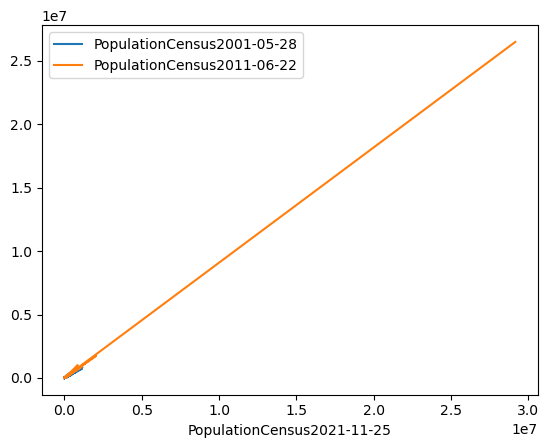

In [18]:
population.plot('PopulationCensus2021-11-25')

In [21]:
# to save this data in our directory
# first assign scraped data into a variable here its df

df= pd.DataFrame(population)

# then save the df into csv with name = scraped

df.to_csv('Scraped.csv', index= False)